In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

In [10]:
# To load df
combined_selected_filled = pd.read_csv(r'C:\Users\Tombra\Vancouver_Weather_Predictions\combined_selected_filled.csv')

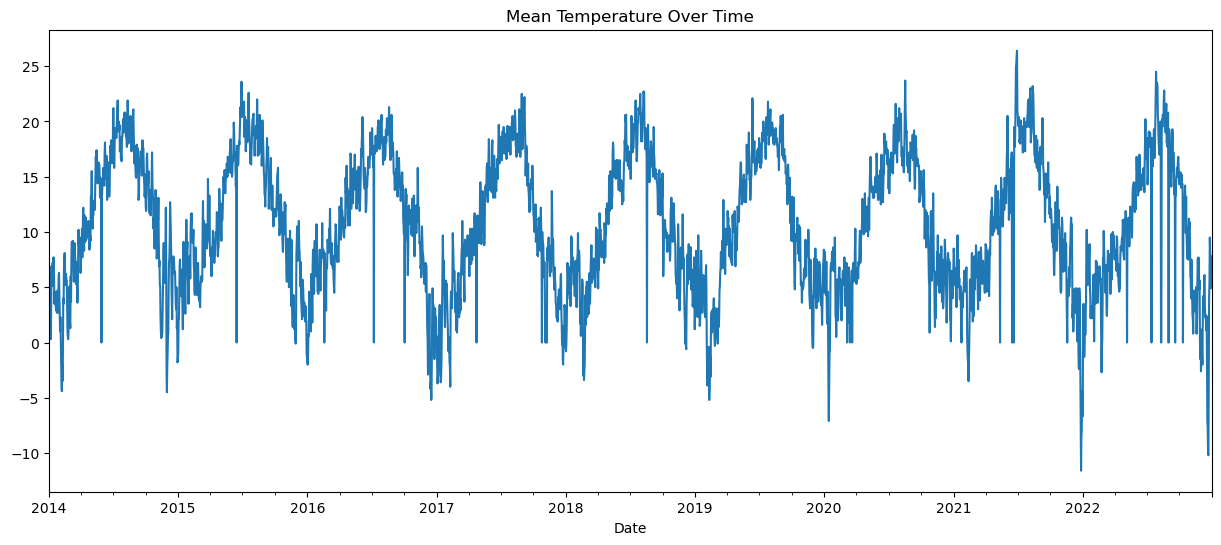

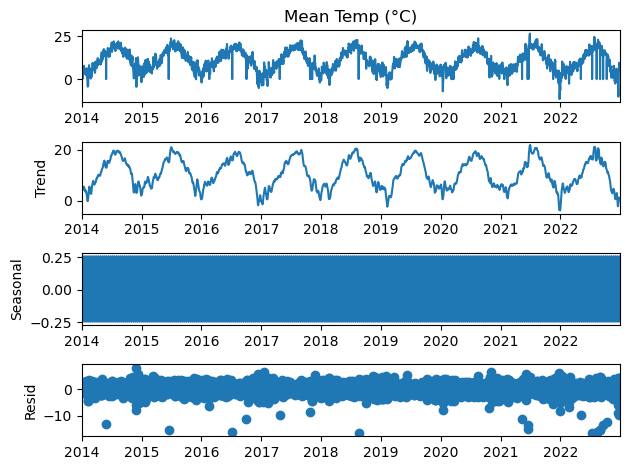

c:\Users\Tombra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


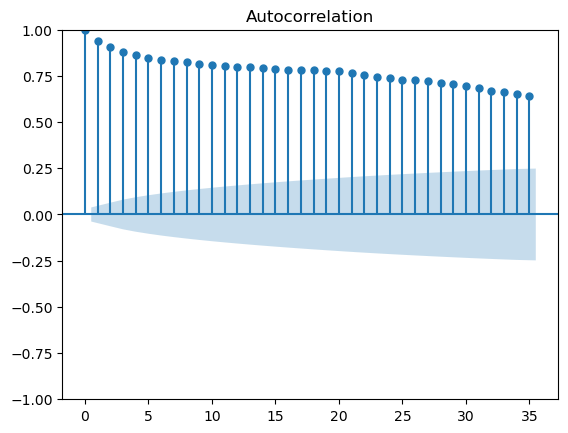

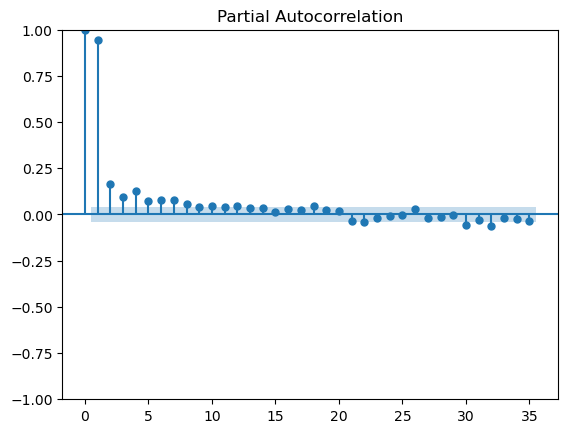

c:\Users\Tombra\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 7.8793886480810515


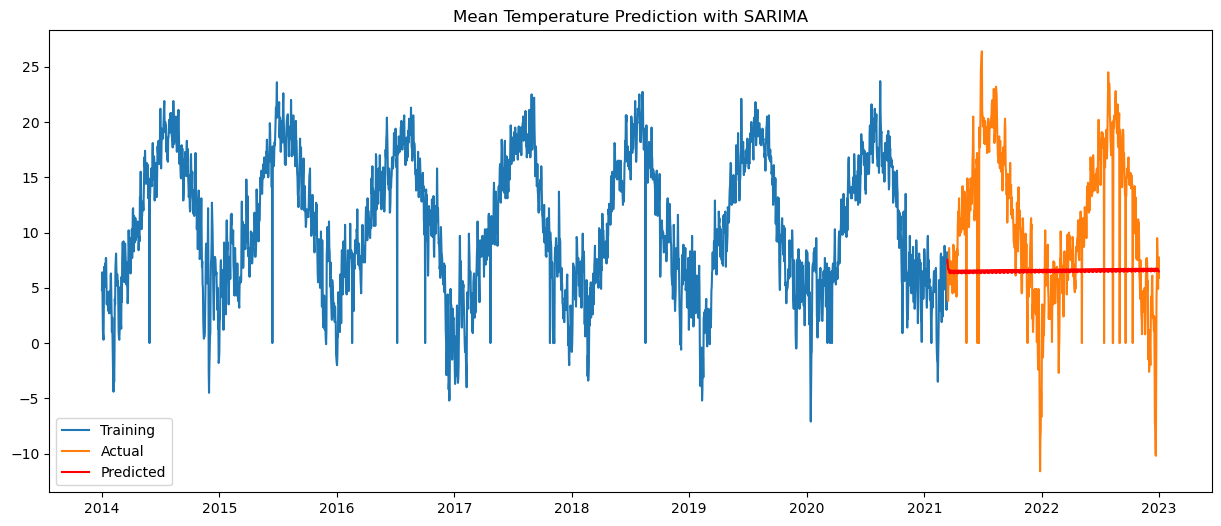

In [11]:
#get a time series model to determine the mean temperature in the year 2023
# Combine date columns into a single datetime column
combined_selected_filled['Date'] = pd.to_datetime(combined_selected_filled[['Year', 'Month', 'Day']])

# Set the date as the index
combined_selected_filled.set_index('Date', inplace=True)

# Plot the time series data
combined_selected_filled['Mean Temp (°C)'].plot(figsize=(15, 6))
plt.title('Mean Temperature Over Time')
plt.show()


# Decompose the time series to understand trends, seasonality, and residuals
result = seasonal_decompose(combined_selected_filled['Mean Temp (°C)'], model='additive', period=12)
result.plot()
plt.show()

# Split the data into training and testing sets
train_size = int(len(combined_selected_filled) * 0.8)
train, test = combined_selected_filled[:train_size], combined_selected_filled[train_size:]

# Plot autocorrelation and partial autocorrelation to determine the order of the SARIMA model
plot_acf(train['Mean Temp (°C)'])
plot_pacf(train['Mean Temp (°C)'])
plt.show()

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Mean Temp (°C)']])
test_scaled = scaler.transform(test[['Mean Temp (°C)']])

# Fit a SARIMA model

order = (1, 1, 1)  # Example order, tune this based on ACF and PACF plots
model = SARIMAX(train_scaled, order=order, seasonal_order=(1, 1, 1, 12))
fit_model = model.fit()

# Predict on the test set
predictions = fit_model.get_forecast(steps=len(test_scaled))
predicted_mean = predictions.predicted_mean

# Inverse transform the predictions to the original scale
predicted_mean_original_scale = scaler.inverse_transform(np.array(predicted_mean).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Mean Temp (°C)'], predicted_mean_original_scale))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train['Mean Temp (°C)'], label='Training')
plt.plot(test['Mean Temp (°C)'], label='Actual')
plt.plot(test.index, predicted_mean_original_scale, label='Predicted', color='red')
plt.title('Mean Temperature Prediction with SARIMA')
plt.legend()
plt.show()


In [12]:
combined_selected_filled

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
Date,,,,,,,,,,,,,
2014-01-01,2014,1,1,6.5,3.0,4.8,13.2,0.0,0.8,0.0,0.8,0.0,<31
2014-01-02,2014,1,2,7.5,5.2,6.4,11.6,0.0,13.8,0.0,13.8,28.0,80
2014-01-03,2014,1,3,6.8,0.5,3.7,14.3,0.0,0.0,0.0,0.0,28.0,76
2014-01-04,2014,1,4,4.9,-2.9,1.0,17.0,0.0,0.0,0.0,0.0,0.0,<31
2014-01-05,2014,1,5,4.7,-3.4,0.7,17.3,0.0,0.0,0.0,0.0,0.0,<31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022,12,27,9.8,6.4,8.1,9.9,0.0,28.8,0.0,28.8,25.0,46.0
2022-12-28,2022,12,28,8.1,3.5,5.8,12.2,0.0,3.8,0.0,3.8,23.0,46.0
2022-12-29,2022,12,29,6.5,3.2,4.9,13.1,0.0,2.9,0.0,2.9,6.0,33.0


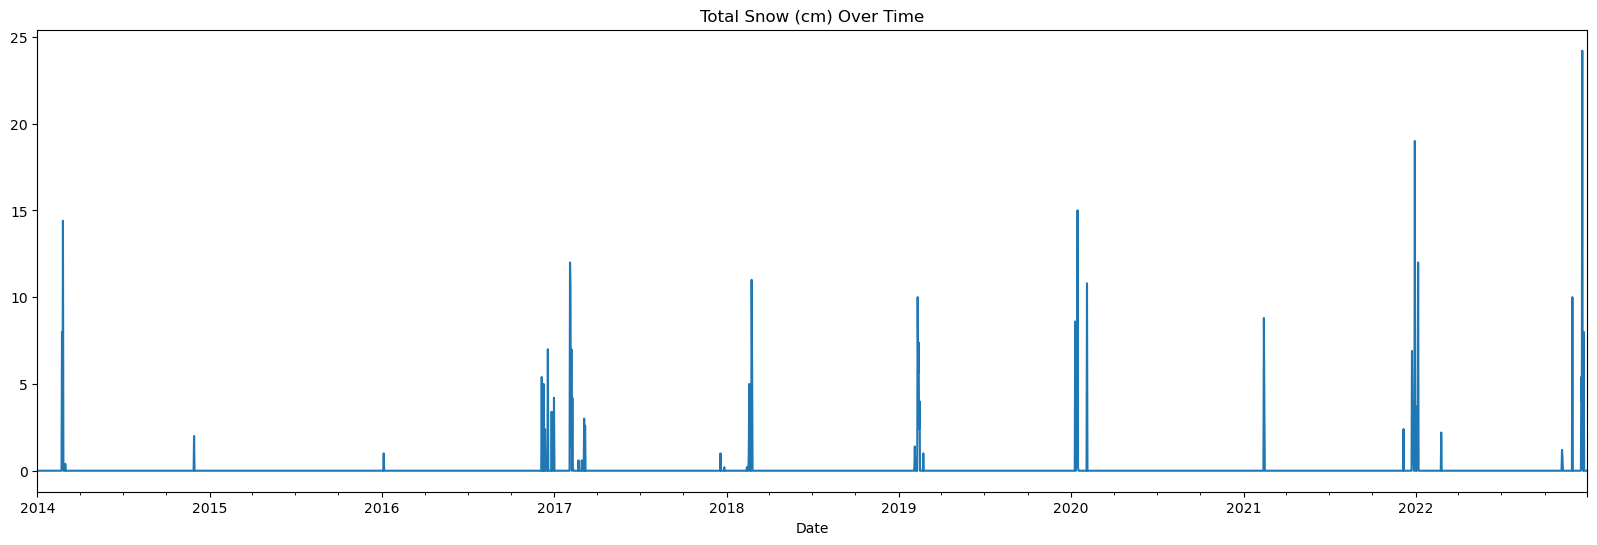

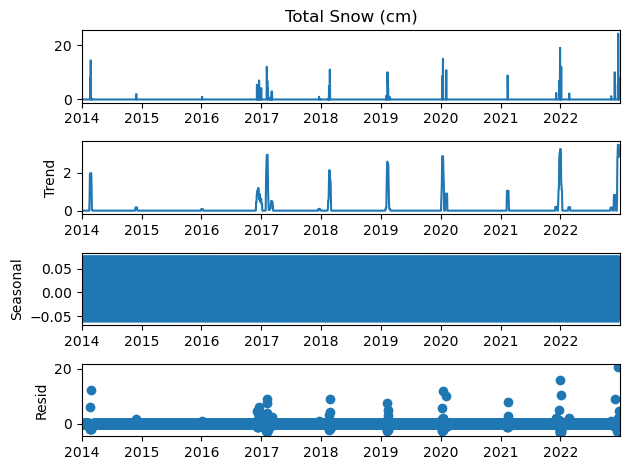

c:\Users\Tombra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


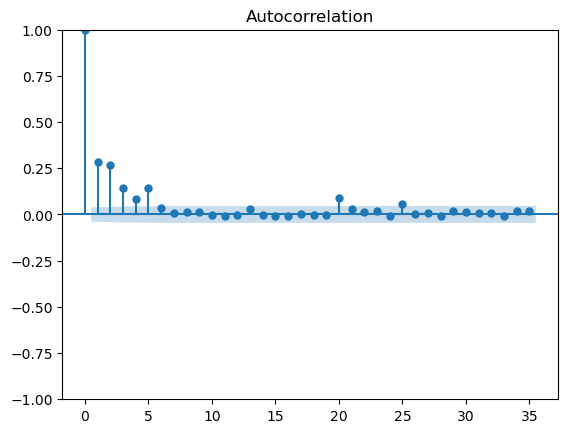

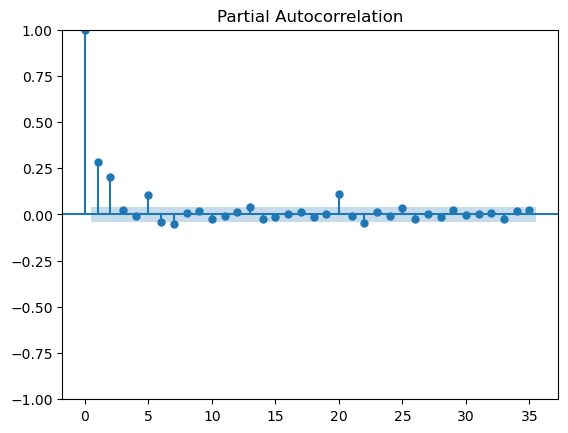

Root Mean Squared Error (RMSE): 1.4507708618515167


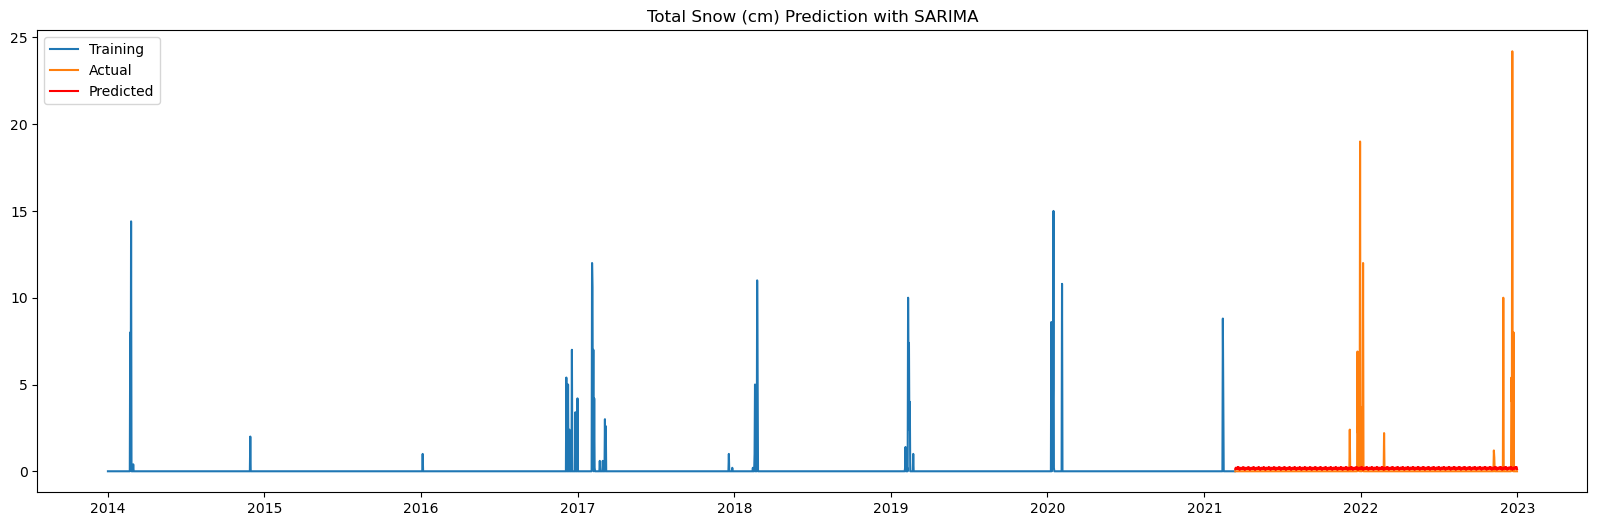

In [13]:
#get a time series model to determine the mean temperature in the year 2023
# Combine date columns into a single datetime column
combined_selected_filled['Date'] = pd.to_datetime(combined_selected_filled[['Year', 'Month', 'Day']])

# Set the date as the index
combined_selected_filled.set_index('Date', inplace=True)

# Plot the time series data
combined_selected_filled['Total Snow (cm)'].plot(figsize=(20, 6))
plt.title('Total Snow (cm) Over Time')
plt.show()


# Decompose the time series to understand trends, seasonality, and residuals
result = seasonal_decompose(combined_selected_filled['Total Snow (cm)'], model='additive', period=12)
result.plot()
plt.show()

# Split the data into training and testing sets
train_size = int(len(combined_selected_filled) * 0.8)
train, test = combined_selected_filled[:train_size], combined_selected_filled[train_size:]

# Plot autocorrelation and partial autocorrelation to determine the order of the SARIMA model
plot_acf(train['Total Snow (cm)'])
plot_pacf(train['Total Snow (cm)'])
plt.show()

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Total Snow (cm)']])
test_scaled = scaler.transform(test[['Total Snow (cm)']])

# Fit a SARIMA model

order = (1, 1, 1)  # Example order, tune this based on ACF and PACF plots
model = SARIMAX(train_scaled, order=order, seasonal_order=(1, 1, 1, 12))
fit_model = model.fit()

# Predict on the test set
predictions = fit_model.get_forecast(steps=len(test_scaled))
predicted_mean = predictions.predicted_mean

# Inverse transform the predictions to the original scale
predicted_mean_original_scale = scaler.inverse_transform(np.array(predicted_mean).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Total Snow (cm)'], predicted_mean_original_scale))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(train['Total Snow (cm)'], label='Training')
plt.plot(test['Total Snow (cm)'], label='Actual')
plt.plot(test.index, predicted_mean_original_scale, label='Predicted', color='red')
plt.title('Total Snow (cm) Prediction with SARIMA')
plt.legend()
plt.show()


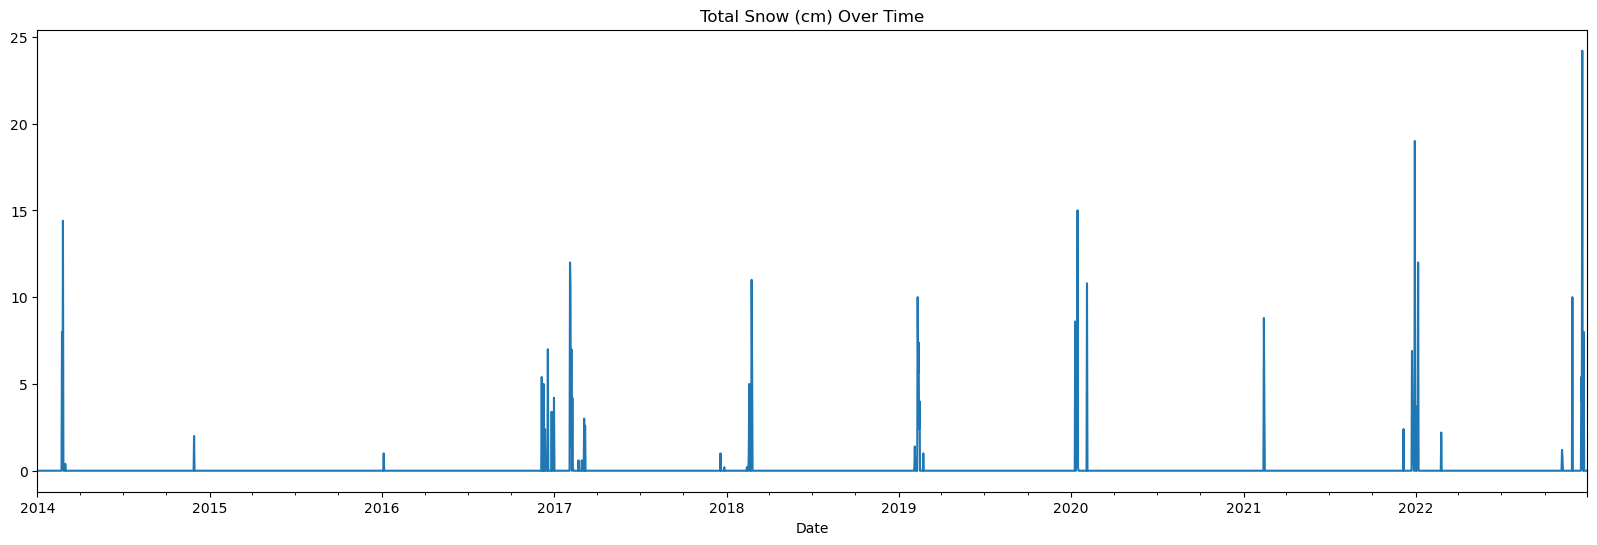

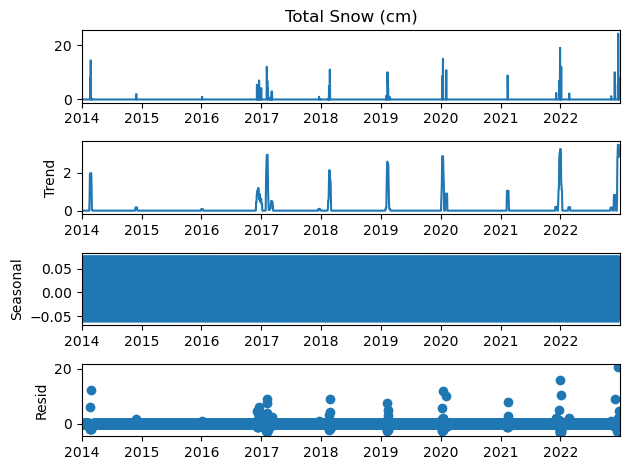

c:\Users\Tombra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


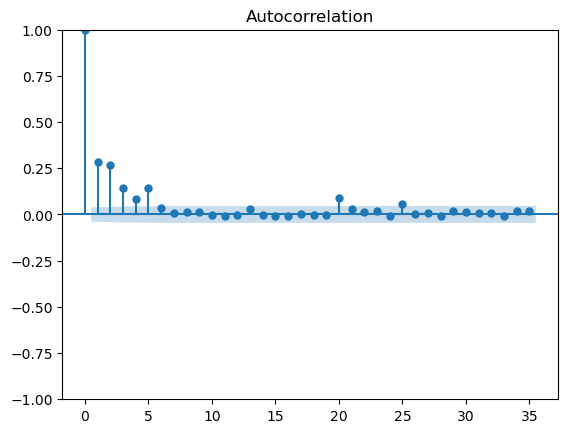

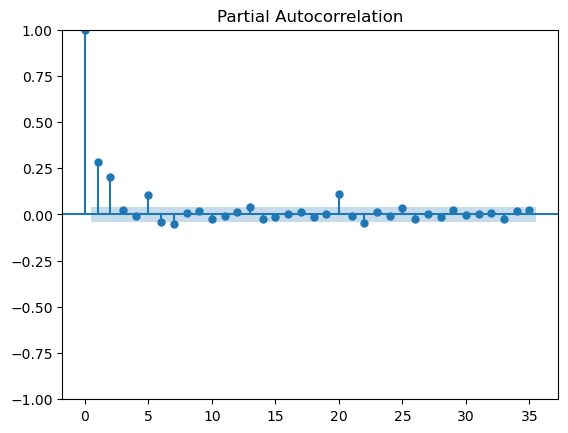

Root Mean Squared Error (RMSE): 1.4507708618515167


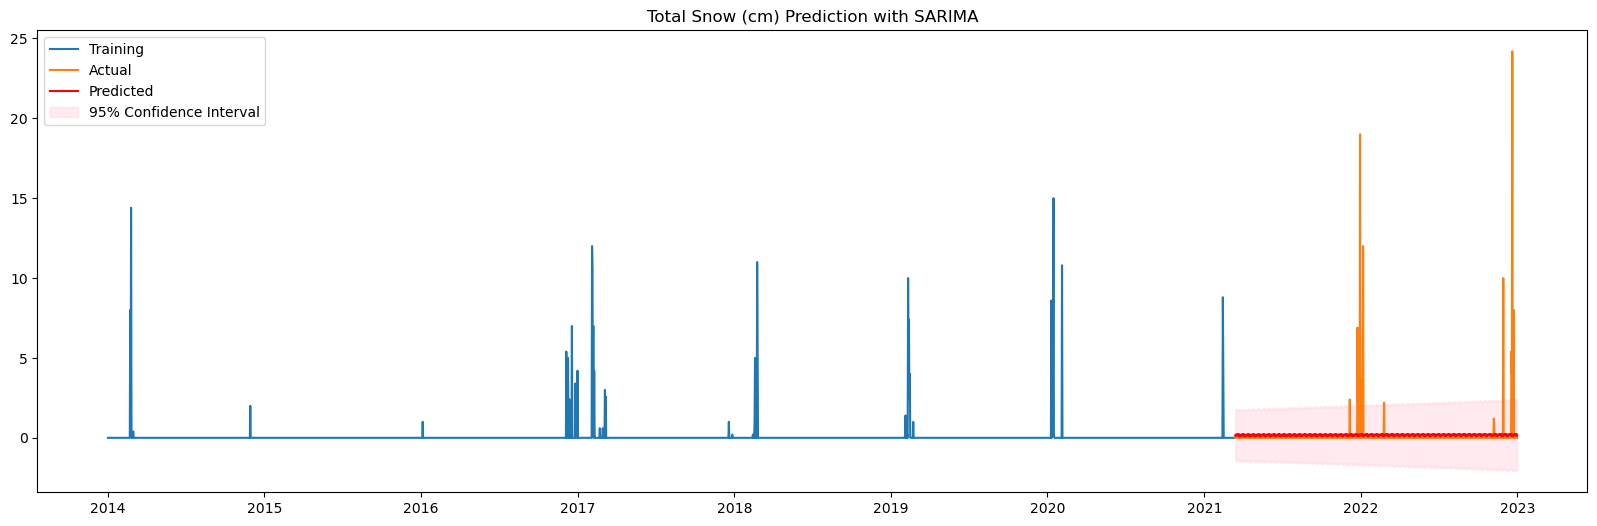

In [16]:
#get a time series model to determine the mean temperature in the year 2023
# Combine date columns into a single datetime column
combined_selected_filled['Date'] = pd.to_datetime(combined_selected_filled[['Year', 'Month', 'Day']])

# Set the date as the index
combined_selected_filled.set_index('Date', inplace=True)

# Plot the time series data
combined_selected_filled['Total Snow (cm)'].plot(figsize=(20, 6))
plt.title('Total Snow (cm) Over Time')
plt.show()


# Decompose the time series to understand trends, seasonality, and residuals
result = seasonal_decompose(combined_selected_filled['Total Snow (cm)'], model='additive', period=12)
result.plot()
plt.show()

# Split the data into training and testing sets
train_size = int(len(combined_selected_filled) * 0.8)
train, test = combined_selected_filled[:train_size], combined_selected_filled[train_size:]

# Plot autocorrelation and partial autocorrelation to determine the order of the SARIMA model
plot_acf(train['Total Snow (cm)'])
plot_pacf(train['Total Snow (cm)'])
plt.show()

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Total Snow (cm)']])
test_scaled = scaler.transform(test[['Total Snow (cm)']])

# Fit a SARIMA model

order = (1, 1, 1)  # Example order, tune this based on ACF and PACF plots
model = SARIMAX(train_scaled, order=order, seasonal_order=(1, 1, 1, 12))
fit_model = model.fit()

# Predict on the test set
predictions = fit_model.get_forecast(steps=len(test_scaled))
predicted_mean = predictions.predicted_mean

# Inverse transform the predictions to the original scale
predicted_mean_original_scale = scaler.inverse_transform(np.array(predicted_mean).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Total Snow (cm)'], predicted_mean_original_scale))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Predict on the test set with confidence intervals
forecast = fit_model.get_forecast(steps=len(test_scaled), alpha=0.05)  # You can adjust the confidence level (e.g., alpha=0.05 for a 95% confidence interval)
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Inverse transform the predictions and confidence intervals to the original scale
predicted_mean_original_scale = scaler.inverse_transform(np.array(predicted_mean).reshape(-1, 1))
lower_bound_original_scale = scaler.inverse_transform(np.array(confidence_intervals[:, 0]).reshape(-1, 1))
upper_bound_original_scale = scaler.inverse_transform(np.array(confidence_intervals[:, 1]).reshape(-1, 1))

# Plot the results with confidence intervals
plt.figure(figsize=(20, 6))
plt.plot(train['Total Snow (cm)'], label='Training')
plt.plot(test['Total Snow (cm)'], label='Actual')
plt.plot(test.index, predicted_mean_original_scale, label='Predicted', color='red')
plt.fill_between(test.index, lower_bound_original_scale.flatten(), upper_bound_original_scale.flatten(), color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Total Snow (cm) Prediction with SARIMA')
plt.legend()
plt.show()




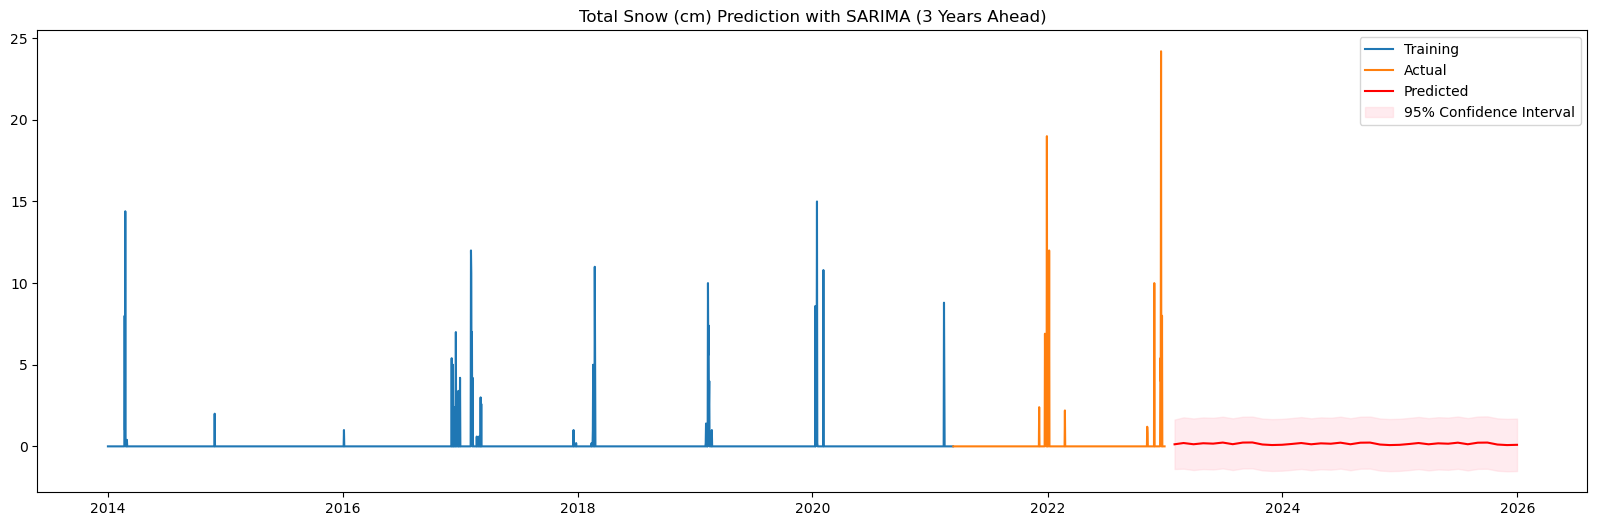

In [17]:
# Assuming your data is sampled in months, and you want to predict 36 months (3 years)
forecast_steps = 36

# Predict on the extended time horizon
forecast = fit_model.get_forecast(steps=forecast_steps, alpha=0.05)
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Inverse transform the predictions and confidence intervals to the original scale
predicted_mean_original_scale = scaler.inverse_transform(np.array(predicted_mean).reshape(-1, 1))
lower_bound_original_scale = scaler.inverse_transform(np.array(confidence_intervals[:, 0]).reshape(-1, 1))
upper_bound_original_scale = scaler.inverse_transform(np.array(confidence_intervals[:, 1]).reshape(-1, 1))

# Extend the time index for plotting
extended_index = pd.date_range(start=test.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the results with confidence intervals
plt.figure(figsize=(20, 6))
plt.plot(train['Total Snow (cm)'], label='Training')
plt.plot(test['Total Snow (cm)'], label='Actual')
plt.plot(extended_index, predicted_mean_original_scale, label='Predicted', color='red')
plt.fill_between(extended_index, lower_bound_original_scale.flatten(), upper_bound_original_scale.flatten(), color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Total Snow (cm) Prediction with SARIMA (3 Years Ahead)')
plt.legend()
plt.show()


In [21]:
!pip install cython



In [ ]:
from fbprophet import Prophet

# Prepare the data
df_prophet = combined_selected_filled.reset_index()[['Date', 'Total Snow (cm)']]
df_prophet.columns = ['ds', 'y']

# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Make future dataframe for predictions
future = model.make_future_dataframe(periods=365*3)  # Predicting 3 years ahead

# Predictions
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)
plt.title('Total Snow (cm) Prediction with Prophet')
plt.show()
